# Project 1 -Circle Classification Problem using KNN #

## Abstract ##

This project investigates how different parameters affect model accuracy in a geometric classification task. This is a solid foundational project that can yield interesting insights about model behavior on simple geometric problems. The problem is a simple circle inside an square. the task is to create a model that can predict if any point inside the square is inside the circle or not.
The results show that the number of neighbors have an inverse effect on the accuracy, recall anf f1 score, but increase the precision.
The minkowski (and Euclidian) methods of calculating the distance are the best and cosine method is the worst, among those studied here. We have not found any considerable effect by the chosen algorithm on the performance of the model.
Finally, the project just create new ambiguties about concepts of performance metrics for the author. It must be studied and revealed.

# Table of Contents
1. [Introduction](#Introduction)
2. [Methodology](#Methodology)
   - 2.1 [Data Generation](#Data-Generation)
   - 2.2 [ML Model](#ML-Model)
   - 2.3 [Parameter Study](#Parameter-Study)
   - 2.4 [Evaluation Metrics](#Evaluation-Metrics)
3. [Results](#Results) 
   - 3.1 [Effect of Number of neighbors](#Effect-of-Number-of-neighbors) 
   - 3.2 [Distance estimation method](#Distance-estimation-method) 
   - 3.3 [The algorithm](#The-algorithm) 
   - 3.4 [The weights](#The-weights)
4. [Discussion](#Discussion)
5. [References](#References)


## Introduction ##

KNN is one of the most famous machine learning models, used in classification problems. The main working principle of this method is to check the class according to the calculated distance of each data point, with the training labeled points, and decide about its class. 
<br/>
In this project we have implemented a simple KNN model and tyied to evaluate the effect of different parameters on it. The parameters, we have studied are the number of neighobrs, the method of calculating distance, the weighting method and the main algorithm. 




## Methodology ##

### Data Generation ###

To have a simple, controllable problem for investigating the effect of different parameters on the model performance, we have created a hypothetical model and do the training and test of the KNN models based on that. The model is a circle inside a square, and the data points are (x,y) points inside the square, that could be inside or outside the circle. The points are classified if they are inside the circle (labeled 1) or outside (labeled 0). For this reason the following code snippet will create cirlce inside the square bounds, and also create a bunch of points inside it, which are generated randomlly, and could be inside or outside the circle. <br>

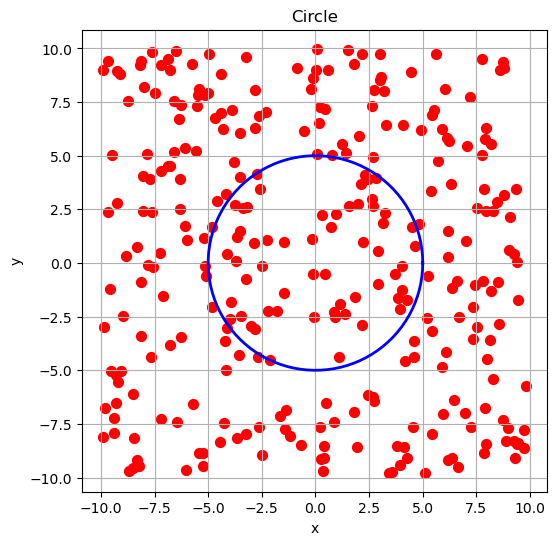

In [64]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0,2*np.pi,100);
radii = 5;
x = radii * np.cos(theta);
y = radii * np.sin(theta);

np.random.seed(42)
number_of_points = 300
x_min_bound = -10
y_min_bound = -10
x_max_bound = 10
y_max_bound = 10
x_points = np.random.uniform(x_min_bound,x_max_bound,number_of_points)
y_points = np.random.uniform(y_min_bound,y_max_bound,number_of_points)


plt.figure(figsize=(6,6));
plt.plot(x,y,'b-',linewidth=2);
plt.scatter(x_points,y_points,color='red',s=50,label="Points")

plt.title("Circle")
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.show()

After generating the points in the domain, they must be labeled for if they are inside or outside the circle. For this reason, we have defined a function called is_inside with the following deinition:

In [84]:
def is_inside(x0,y0,r0):
    return x0**2.+y0**2 <= radii**2

This function returns true if the point is inside or on the circle, and false if it is outside the circle. Then the following code snippet will loop through all of the generated points, and label them with 1, if they are inside and 0 if they are outside the circle:

In [87]:
Points = []
Labels = []
for index, x0 in enumerate(x_points):
    y0 = y_points[index]
    Points.append((x0,y0))
    if (is_inside(x0,y0,radii)):
        Labels.append(1)
    else:
        Labels.append(0)

### ML Model ###

Now, the points are all labeled, we have to prepare the machine learning model. We will use the scikit-learn[1] package functionalities to prepare the model and data. For this reason, the generated data must be splitted into train and test groups. Then, we will use KNeighborsClassifier model, as it is the target of this project. Here you can find a code snippet, which implements these, with default parameters:

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(Points,Labels,train_size=0.25,shuffle=True)
clf = KNeighborsClassifier(n_neighbors=4,weights='uniform',algorithm='auto')
clf.fit(X_train,y_train)
print("Test set accuracy = {}".format(clf.score(X_test,y_test)))

Test set accuracy = 0.92


As you may consider the accuracy of the model on the test data is 92%. 

### Parameter Study ###

In this project, we will check and evaluate the effect of different parameters on the model performance. The parameters to be studied are as follows:
<ul>
    <li>Number of neighbors</li>
    <li>Distance estimation method</li>
    <li>The algorithm</li>
    <li>The weights</li>
    <li>Number of training points</li>
</ul>

### Evaluation Metrics ###

To have a quantitative metric for evaluation, we will use the following parameters:
<ul>
    <li>Accuracy</li>
    <li>Precision</li>
    <li>Recall</li>
    <li>F1-Score</li>
</ul>

## Results ##

### Effect of Number of neighbors ###

To evaluate the effect of number of neighbors on the model performance, we will keep all of the other parameters as their default values, and only change this parameter. 

In [184]:
n_neighbors_list = np.unique(np.linspace(1, 75, 75).astype(int))
scores_list = []
for n in n_neighbors_list:
    clf1 = KNeighborsClassifier(n_neighbors=n)
    clf1.fit(X_train,y_train)
    scores_list.append(clf1.score(X_test,y_test))


So, the scores are:

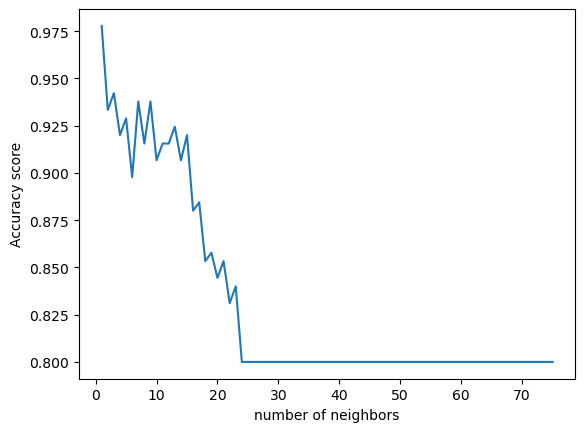

In [189]:
plt.plot(n_neighbors_list,scores_list)
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy score')
plt.show()

According to the above chart, the accuracy will decrease if the number of neighbors increase too much. It will be as low as 80%. The maximum value for accuracy took place at n=1. We can also find few local maximums in the curve.
This could be highly influenced by the number of points, used for training. so the following code, will change the number of generated points, and then create the model and compare the effect of number of neighbors.


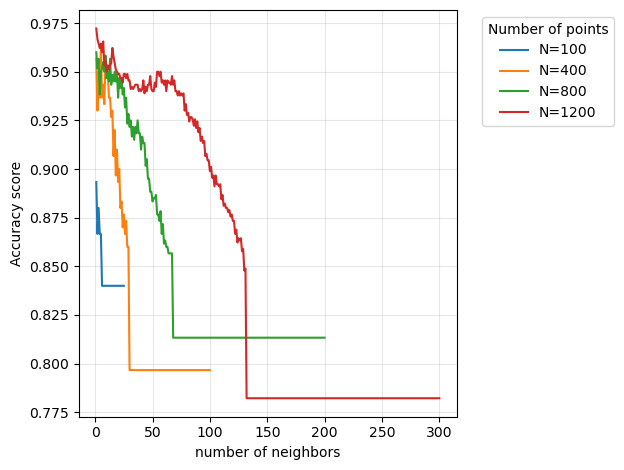

Hello


In [222]:
theta = np.linspace(0,2*np.pi,100);
radii = 5;
x = radii * np.cos(theta);
y = radii * np.sin(theta);

np.random.seed(42)
x_min_bound = -10
y_min_bound = -10
x_max_bound = 10
y_max_bound = 10

for number_of_points in [100,400,800,1200]:
    x_points = np.random.uniform(x_min_bound,x_max_bound,number_of_points)
    y_points = np.random.uniform(y_min_bound,y_max_bound,number_of_points)

    Points = []
    Labels = []
    for index, x0 in enumerate(x_points):
        y0 = y_points[index]
        Points.append((x0,y0))
        if (is_inside(x0,y0,radii)):
            Labels.append(1)
        else:
            Labels.append(0)
    X_train,X_test,y_train,y_test = train_test_split(Points,Labels,train_size=0.25,shuffle=True)

    n_neighbors_list = np.unique(np.linspace(1, int(0.25*number_of_points),int(0.25*number_of_points)).astype(int))
    scores_list = []
    for n in n_neighbors_list:
        clf1 = KNeighborsClassifier(n_neighbors=n)
        clf1.fit(X_train,y_train)
        scores_list.append(clf1.score(X_test,y_test))
    plt.plot(n_neighbors_list,scores_list,label=f'N={number_of_points}')
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy score')
plt.legend(title="Number of points",bbox_to_anchor=(1.05,1),loc='upper left')
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

According to the above chart, increasing the number of points, do not affect the general behaviour fo the accuracy-n curve. in the other words, in all of the curves, the general trend is downward, with some local maximums. But, the range of variation, is increased by increasing the number of points. The following curve shows the Accuracy-N variation for only n=1200

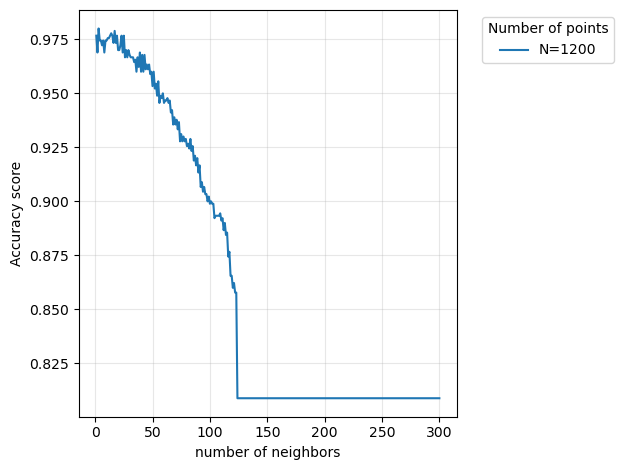

In [228]:
theta = np.linspace(0,2*np.pi,100);
radii = 5;
x = radii * np.cos(theta);
y = radii * np.sin(theta);

np.random.seed(42)
x_min_bound = -10
y_min_bound = -10
x_max_bound = 10
y_max_bound = 10

for number_of_points in [1200]:
    x_points = np.random.uniform(x_min_bound,x_max_bound,number_of_points)
    y_points = np.random.uniform(y_min_bound,y_max_bound,number_of_points)

    Points = []
    Labels = []
    for index, x0 in enumerate(x_points):
        y0 = y_points[index]
        Points.append((x0,y0))
        if (is_inside(x0,y0,radii)):
            Labels.append(1)
        else:
            Labels.append(0)
    X_train,X_test,y_train,y_test = train_test_split(Points,Labels,train_size=0.25,shuffle=True)

    n_neighbors_list = np.unique(np.linspace(1, int(0.25*number_of_points),int(0.25*number_of_points)).astype(int))
    scores_list = []
    for n in n_neighbors_list:
        clf1 = KNeighborsClassifier(n_neighbors=n)
        clf1.fit(X_train,y_train)
        scores_list.append(clf1.score(X_test,y_test))
    plt.plot(n_neighbors_list,scores_list,label=f'N={number_of_points}')
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy score')
plt.legend(title="Number of points",bbox_to_anchor=(1.05,1),loc='upper left')
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

The maximum value is:

In [235]:
max0 = max(scores_list)
max_index = scores_list.index(max0)
max_index

2

After evaluating the effect of number of neighbors on the accuracy, we have to find out more about its effect on other model performance parameters, such as precision, Recall, and F1-score. So, the following code will do it:

C:\Users\PSS-balali\AppData\Local\Temp\ipykernel_3136\2946890419.py:40: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(tp/(tp+fp))


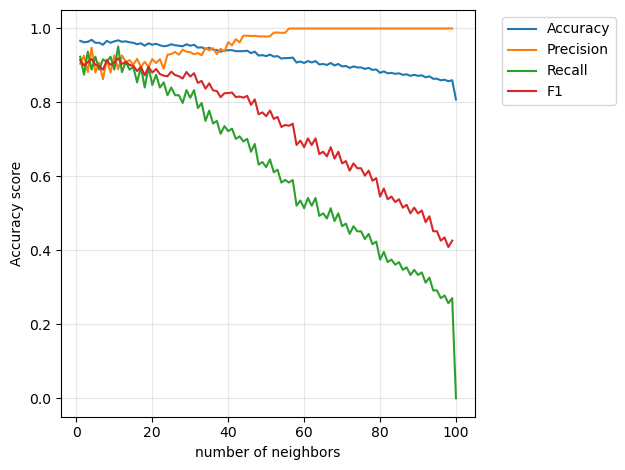

In [266]:
from sklearn.metrics import confusion_matrix

theta = np.linspace(0,2*np.pi,100);
radii = 5;
x = radii * np.cos(theta);
y = radii * np.sin(theta);

np.random.seed(42)
x_min_bound = -10
y_min_bound = -10
x_max_bound = 10
y_max_bound = 10

for number_of_points in [1000]:
    x_points = np.random.uniform(x_min_bound,x_max_bound,number_of_points)
    y_points = np.random.uniform(y_min_bound,y_max_bound,number_of_points)

    Points = []
    Labels = []
    for index, x0 in enumerate(x_points):
        y0 = y_points[index]
        Points.append((x0,y0))
        if (is_inside(x0,y0,radii)):
            Labels.append(1)
        else:
            Labels.append(0)
    X_train,X_test,y_train,y_test = train_test_split(Points,Labels,train_size=0.25,shuffle=True)

    n_neighbors_list = np.unique(np.linspace(1, int(0.1*number_of_points),int(0.1*number_of_points)).astype(int))
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for n in n_neighbors_list:
        clf1 = KNeighborsClassifier(n_neighbors=n)
        clf1.fit(X_train,y_train)
        tn, fp, fn, tp = confusion_matrix(y_test,clf1.predict(X_test)).ravel()
        metrics.append([tn,fp,fn,tp])
        accuracy.append((tn+tp)/(tn+tp+fp+fn))
        precision.append(tp/(tp+fp))
        recall.append(tp/(tp+fn))
        f1.append(2*(precision[-1]*recall[-1])/(precision[-1]+recall[-1]))
    plt.plot(n_neighbors_list,accuracy,label=f'Accuracy')
    plt.plot(n_neighbors_list,precision,label=f'Precision')
    plt.plot(n_neighbors_list,recall,label=f'Recall')
    plt.plot(n_neighbors_list,f1,label=f'F1')

plt.xlabel('number of neighbors')
plt.ylabel('Accuracy score')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

Surprisingly, all other performance parameters, decrease with increasing the number of points for this problem, except percision, which is an upward curce. the following chart shows the precision curve, only.

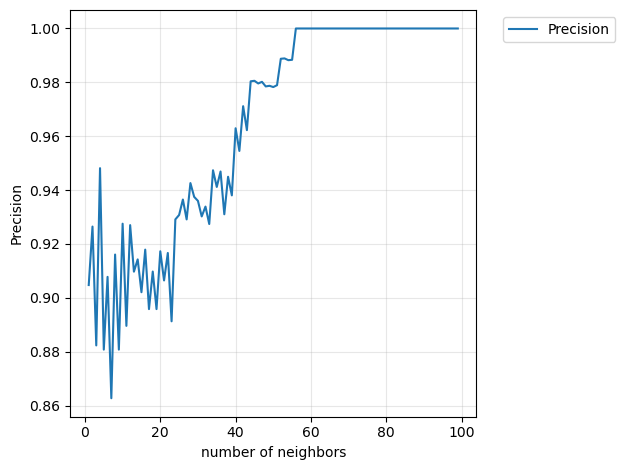

In [272]:
plt.plot(n_neighbors_list,precision,label=f'Precision')
plt.xlabel('number of neighbors')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

So, by increasing the number of neighobrs, we will have a much higher precision of predicting, in the other words, if the model predict the point is inside the circle, it is (with high probability, because the precision is high). but, the recall and accuracy falls down, for higher number of points. So, it means that altough the points which are guessed to be true, are correctly inside the circle (for higher number of points), but the points which are wrongly predicted to be outside the circle are also increased in higher number of points.  

Now, we can also check if the total number of points has a major effect on this result:

C:\Users\PSS-balali\AppData\Local\Temp\ipykernel_3136\3662513205.py:40: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(tp/(tp+fp))
C:\Users\PSS-balali\AppData\Local\Temp\ipykernel_3136\3662513205.py:40: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(tp/(tp+fp))
C:\Users\PSS-balali\AppData\Local\Temp\ipykernel_3136\3662513205.py:40: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(tp/(tp+fp))
C:\Users\PSS-balali\AppData\Local\Temp\ipykernel_3136\3662513205.py:40: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(tp/(tp+fp))
C:\Users\PSS-balali\AppData\Local\Temp\ipykernel_3136\3662513205.py:40: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(tp/(tp+fp))
C:\Users\PSS-balali\AppData\Local\Temp\ipykernel_3136\3662513205.py:40: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(tp/(tp+fp))
C:\Users\PSS-balali\AppData\

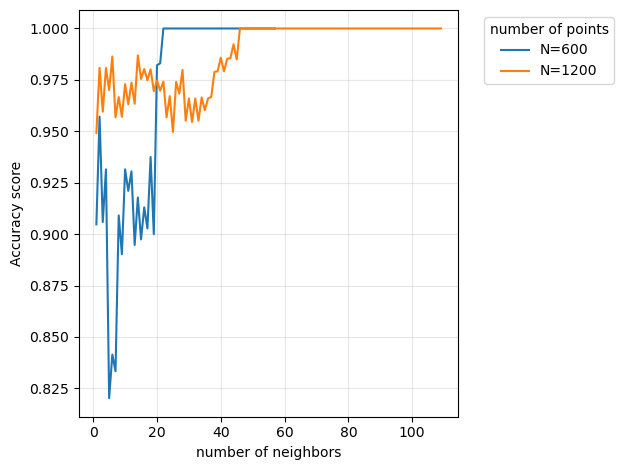

In [285]:
from sklearn.metrics import confusion_matrix

theta = np.linspace(0,2*np.pi,100);
radii = 5;
x = radii * np.cos(theta);
y = radii * np.sin(theta);

np.random.seed(42)
x_min_bound = -10
y_min_bound = -10
x_max_bound = 10
y_max_bound = 10

for number_of_points in [600,1200]:
    x_points = np.random.uniform(x_min_bound,x_max_bound,number_of_points)
    y_points = np.random.uniform(y_min_bound,y_max_bound,number_of_points)

    Points = []
    Labels = []
    for index, x0 in enumerate(x_points):
        y0 = y_points[index]
        Points.append((x0,y0))
        if (is_inside(x0,y0,radii)):
            Labels.append(1)
        else:
            Labels.append(0)
    X_train,X_test,y_train,y_test = train_test_split(Points,Labels,train_size=0.25,shuffle=True)

    n_neighbors_list = np.unique(np.linspace(1, int(0.1*number_of_points),int(0.1*number_of_points)).astype(int))
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for n in n_neighbors_list:
        clf1 = KNeighborsClassifier(n_neighbors=n)
        clf1.fit(X_train,y_train)
        tn, fp, fn, tp = confusion_matrix(y_test,clf1.predict(X_test)).ravel()
        metrics.append([tn,fp,fn,tp])
        accuracy.append((tn+tp)/(tn+tp+fp+fn))
        precision.append(tp/(tp+fp))
        recall.append(tp/(tp+fn))
        f1.append(2*(precision[-1]*recall[-1])/(precision[-1]+recall[-1]))
    plt.plot(n_neighbors_list,precision,label=f'N={number_of_points}')

plt.xlabel('number of neighbors')
plt.ylabel('Accuracy score')
plt.legend(title="number of points",bbox_to_anchor=(1.05,1),loc='upper left')
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

So, the general trend is confirmed.

### Distance estimation method ###

There are different methods available for distance estimation in KNN model. Some of the most important and famous methods are:
<ul>
    <li>minkowski</li>
    <li>euclidean</li>
    <li>cityblock</li>
    <li>cosine</li>
</ul>
We will check the effect of choosing any of the mentioned methods on the performance of our KNN model.

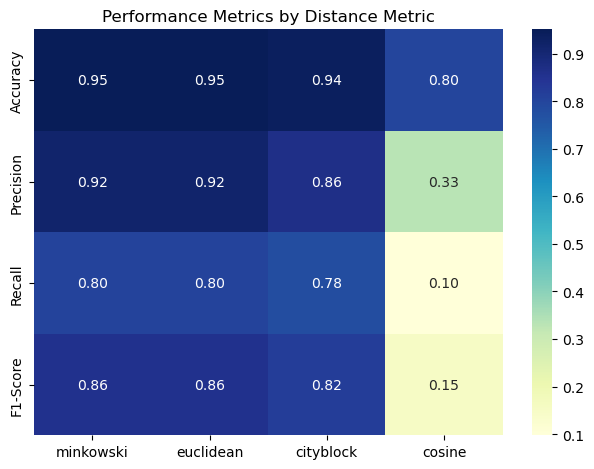

In [318]:
theta = np.linspace(0,2*np.pi,100);
radii = 5;
x = radii * np.cos(theta);
y = radii * np.sin(theta);

np.random.seed(42)
x_min_bound = -10
y_min_bound = -10
x_max_bound = 10
y_max_bound = 10

for number_of_points in [300]:
    x_points = np.random.uniform(x_min_bound,x_max_bound,number_of_points)
    y_points = np.random.uniform(y_min_bound,y_max_bound,number_of_points)

    Points = []
    Labels = []
    for index, x0 in enumerate(x_points):
        y0 = y_points[index]
        Points.append((x0,y0))
        if (is_inside(x0,y0,radii)):
            Labels.append(1)
        else:
            Labels.append(0)
    X_train,X_test,y_train,y_test = train_test_split(Points,Labels,train_size=0.25,shuffle=True)

    n_neighbors = 2
    methods_list = ["minkowski","euclidean","cityblock","cosine"]
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for method in methods_list:
        clf1 = KNeighborsClassifier(n_neighbors=n_neighbors,metric=method)
        clf1.fit(X_train,y_train)
        tn, fp, fn, tp = confusion_matrix(y_test,clf1.predict(X_test)).ravel()
        metrics.append([tn,fp,fn,tp])
        accuracy.append((tn+tp)/(tn+tp+fp+fn))
        precision.append(tp/(tp+fp))
        recall.append(tp/(tp+fn))
        f1.append(2*(precision[-1]*recall[-1])/(precision[-1]+recall[-1]))


metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
methods = ["minkowski", "euclidean", "cityblock", "cosine"]
data = np.array([accuracy, precision, recall, f1])

fig, ax = plt.subplots()
sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=methods, yticklabels=metrics_names)
ax.set_title('Performance Metrics by Distance Metric')
plt.tight_layout()
plt.show()

According to this chart, the minkowski method, shows the best results, and cosie method the worst.

### The algorithm ###

The algorithms implemented in scikit-learn KNN model are:
<ul>
    <li>ball_tree</li>
    <li>kd_tree</li>
    <li>brute</li>
    <li>auto</li>
</ul>
the auto algorithm will attempt to decide the most appropriate algorithm based on the value passed to fit method. We will compare the results based on all of them.

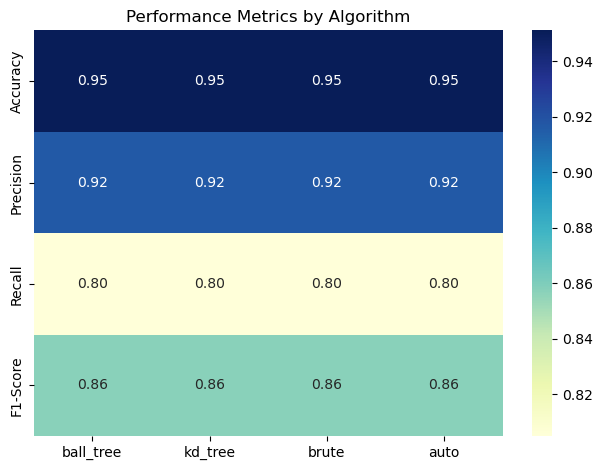

In [339]:
theta = np.linspace(0,2*np.pi,100);
radii = 5;
x = radii * np.cos(theta);
y = radii * np.sin(theta);

np.random.seed(42)
x_min_bound = -10
y_min_bound = -10
x_max_bound = 10
y_max_bound = 10

for number_of_points in [300]:
    x_points = np.random.uniform(x_min_bound,x_max_bound,number_of_points)
    y_points = np.random.uniform(y_min_bound,y_max_bound,number_of_points)

    Points = []
    Labels = []
    for index, x0 in enumerate(x_points):
        y0 = y_points[index]
        Points.append((x0,y0))
        if (is_inside(x0,y0,radii)):
            Labels.append(1)
        else:
            Labels.append(0)
    X_train,X_test,y_train,y_test = train_test_split(Points,Labels,train_size=0.25,shuffle=True)

    n_neighbors = 2
    algorithms_list = ["ball_tree","kd_tree","brute","auto"]
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for algorithm in algorithms_list:
        clf1 = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm = algorithm)
        clf1.fit(X_train,y_train)
        tn, fp, fn, tp = confusion_matrix(y_test,clf1.predict(X_test)).ravel()
        metrics.append([tn,fp,fn,tp])
        accuracy.append((tn+tp)/(tn+tp+fp+fn))
        precision.append(tp/(tp+fp))
        recall.append(tp/(tp+fn))
        f1.append(2*(precision[-1]*recall[-1])/(precision[-1]+recall[-1]))


metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
methods = ["ball_tree","kd_tree","brute","auto"]
data = np.array([accuracy, precision, recall, f1])

fig, ax = plt.subplots()
sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=methods, yticklabels=metrics_names)
ax.set_title('Performance Metrics by Algorithm')
plt.tight_layout()
plt.show()

According to the chat, there is no special difference on the results, based on the algorithm. Or, in the other words, all of the algorithms lead to the same results and predictions. To be sure, that the number of points is not a major parameter, we will recalculate the chart using 1000 points:

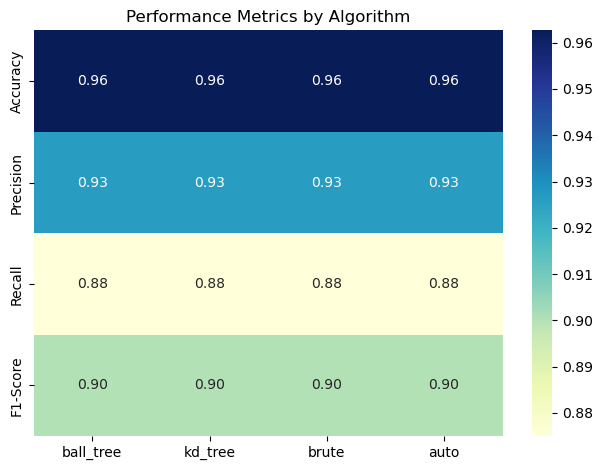

In [341]:
theta = np.linspace(0,2*np.pi,100);
radii = 5;
x = radii * np.cos(theta);
y = radii * np.sin(theta);

np.random.seed(42)
x_min_bound = -10
y_min_bound = -10
x_max_bound = 10
y_max_bound = 10

for number_of_points in [1000]:
    x_points = np.random.uniform(x_min_bound,x_max_bound,number_of_points)
    y_points = np.random.uniform(y_min_bound,y_max_bound,number_of_points)

    Points = []
    Labels = []
    for index, x0 in enumerate(x_points):
        y0 = y_points[index]
        Points.append((x0,y0))
        if (is_inside(x0,y0,radii)):
            Labels.append(1)
        else:
            Labels.append(0)
    X_train,X_test,y_train,y_test = train_test_split(Points,Labels,train_size=0.25,shuffle=True)

    n_neighbors = 2
    algorithms_list = ["ball_tree","kd_tree","brute","auto"]
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for algorithm in algorithms_list:
        clf1 = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm = algorithm)
        clf1.fit(X_train,y_train)
        tn, fp, fn, tp = confusion_matrix(y_test,clf1.predict(X_test)).ravel()
        metrics.append([tn,fp,fn,tp])
        accuracy.append((tn+tp)/(tn+tp+fp+fn))
        precision.append(tp/(tp+fp))
        recall.append(tp/(tp+fn))
        f1.append(2*(precision[-1]*recall[-1])/(precision[-1]+recall[-1]))


metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
methods = ["ball_tree","kd_tree","brute","auto"]
data = np.array([accuracy, precision, recall, f1])

fig, ax = plt.subplots()
sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=methods, yticklabels=metrics_names)
ax.set_title('Performance Metrics by Algorithm')
plt.tight_layout()
plt.show()

So, the performance parameter are still independent of the algorithm, in high number of points, too.

### The weights ###

We will compare the performance metrics for two types of weights:
<ul>
    <li>uniform</li>
    <li>distance</li>
</ul>
In uniform weighting, all of the points in each neighborhood are weighted equally, but in the distance method, the weight of each point is directly dependent to its distance inverse.

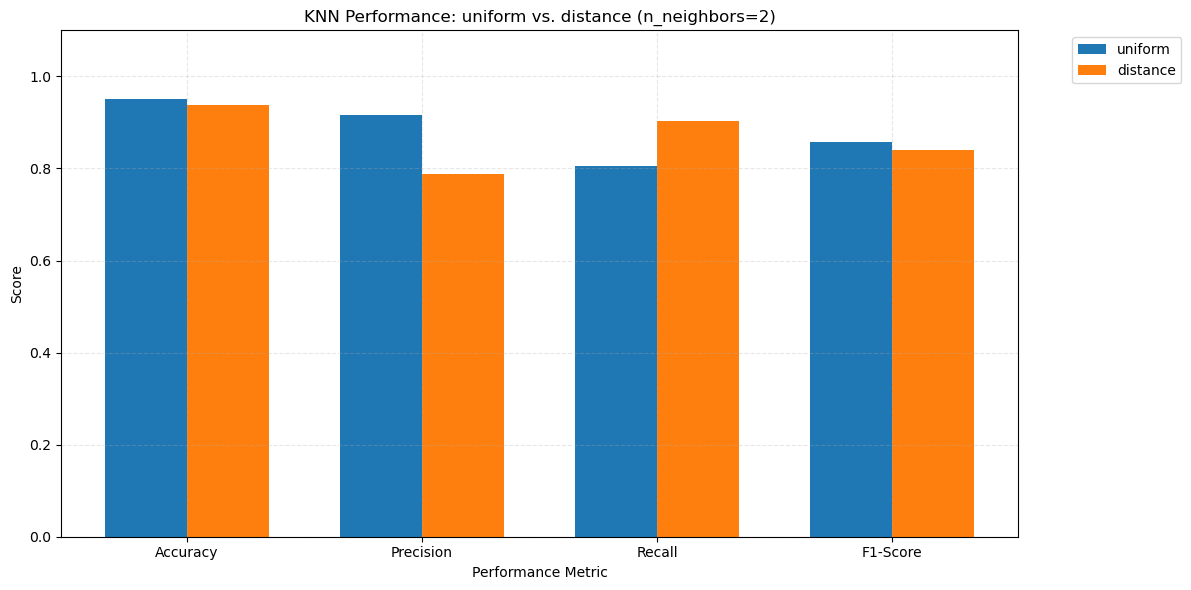

In [375]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Generate data (circle inside square)
np.random.seed(42)
radii = 5
number_of_points = 300
x_points = np.random.uniform(-10, 10, number_of_points)
y_points = np.random.uniform(-10, 10, number_of_points)

Points = np.column_stack((x_points, y_points))
Labels = np.where(x_points**2 + y_points**2 <= radii**2, 1, 0)  # 1=inside, 0=outside

X_train, X_test, y_train, y_test = train_test_split(Points, Labels, train_size=0.25, shuffle=True)

# Evaluate KNN with different weight methods
n_neighbors = 2
weight_list = ["uniform", "distance"]
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for weight in weight_list:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weight)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    metrics['Accuracy'].append((tp + tn) / (tp + tn + fp + fn))
    metrics['Precision'].append(tp / (tp + fp))
    metrics['Recall'].append(tp / (tp + fn))
    metrics['F1-Score'].append(2 * (metrics['Precision'][-1] * metrics['Recall'][-1]) / 
                              (metrics['Precision'][-1] + metrics['Recall'][-1]))

# Plotting
x = np.arange(len(metrics))  # 4 groups (Accuracy, Precision, Recall, F1)
width = 0.35  # Width of each bar
colors = ['#1f77b4', '#ff7f0e']  # Colors for uniform & distance

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for uniform and distance side by side in each group
for i, weight in enumerate(weight_list):
    values = [metrics[metric][i] for metric in metrics]
    ax.bar(x + i * width, values, width, label=weight, color=colors[i])

# Customize plot
ax.set_xlabel('Performance Metric')
ax.set_ylabel('Score')
ax.set_title('KNN Performance: uniform vs. distance (n_neighbors=2)')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(metrics.keys())
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_ylim(0, 1.1)  # Adjust y-axis limit if needed

plt.tight_layout()
plt.show()

According to this chart, the accuracy is not much affected ny the weighting method, but Precision and recall show change in their values. And their changes are in opposite direction. In the other words, by changing the weighting method, from uniform to distance, the precision will decrease, but recall will increase.


### Discussion ###

We have compared the effect of different parameters on the performance of a KNN model, implemented on a simple, hypothetical problem. The number of points show a decreasing effect on most of the performance metrics, except precision. Algorithm does not change the results, and the best distance calculation method was minkowski. The weighting method has an effect on Precision and Recall, but not any one the accuracy and F1-score.
After completing this project, I think there is something ambigues about the distribution of points and its effect on the model performance metrics. This is more emphsaized when checking the effect of weighting function, that shows special effect on precision and recall. or when we consider the effect of number_of_neighbors on the precision, which shows an increase.
This ambiguty must be clarified by furthre study and reasoning.

**References**  
1. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

